# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [123]:
# List for holding lat_lngs and cities
lat_lngs = []
print (lat_lngs)
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

[]


603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [124]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold api reponse
api_cities = []
latitude = []
longitude = []
temperature_max = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each

#Header of print log
print (f'Beginning Data Retrival')

#Variables to set initial values of record and set of print log
record_number = 0
set_number = 1

#Loop through each city from Cities list
for city in cities:
  
      #increments record and set count up until 50, get out of the loop and start the next set of count
    if (record_number > 50):
        record_number = 0
        set_number = set_number + 1
 
    print(f'Processing Record {record_number} Set of {set_number} | {city}')
    record_number = record_number + 1
    
    city_url = query_url + city
    print (city_url) #print each individual URL the API will call and get response from
    
    response = requests.get(query_url + city).json()
       
    if response ['cod'] == 200: #checks if response is sucessfull, if other than 200, skip code below
            api_cities.append(response['name'])
            latitude.append(response['coord']['lat'])
            longitude.append(response['coord']['lon'])
            temperature_max.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])




Beginning Data Retrival
Processing Record 0 Set of 1 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=illoqqortoormiut
Processing Record 1 Set of 1 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=luderitz
Processing Record 2 Set of 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=rikitea
Processing Record 3 Set of 1 | maceio
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=maceio
Processing Record 4 Set of 1 | grand-lahou
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=grand-lahou
Processing Record 5 Set of 1 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=georgetown
Processing Record 6 Set of 1 | faanui
http://api.openwea

Processing Record 4 Set of 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=ushuaia
Processing Record 5 Set of 2 | sisimiut
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=sisimiut
Processing Record 6 Set of 2 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=arraial do cabo
Processing Record 7 Set of 2 | castro
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=castro
Processing Record 8 Set of 2 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=busselton
Processing Record 9 Set of 2 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=saint-philippe
Processing Record 10 Set of 2 | butaritari
http://api.openweathermap.org/data/

Processing Record 7 Set of 3 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=cape town
Processing Record 8 Set of 3 | leh
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=leh
Processing Record 9 Set of 3 | san quintin
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=san quintin
Processing Record 10 Set of 3 | catamarca
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=catamarca
Processing Record 11 Set of 3 | yurga
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=yurga
Processing Record 12 Set of 3 | denpasar
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=denpasar
Processing Record 13 Set of 3 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8

Processing Record 10 Set of 4 | amderma
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=amderma
Processing Record 11 Set of 4 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=kloulklubed
Processing Record 12 Set of 4 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=ilulissat
Processing Record 13 Set of 4 | puerto padre
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=puerto padre
Processing Record 14 Set of 4 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=mount gambier
Processing Record 15 Set of 4 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=vardo
Processing Record 16 Set of 4 | adrar
http://api.openweathermap.org/data/2.5

Processing Record 13 Set of 5 | catio
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=catio
Processing Record 14 Set of 5 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=saldanha
Processing Record 15 Set of 5 | fukue
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=fukue
Processing Record 16 Set of 5 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=barentsburg
Processing Record 17 Set of 5 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=umzimvubu
Processing Record 18 Set of 5 | tabuk
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=tabuk
Processing Record 19 Set of 5 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8

Processing Record 17 Set of 6 | jiangyou
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=jiangyou
Processing Record 18 Set of 6 | grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=grand river south east
Processing Record 19 Set of 6 | talara
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=talara
Processing Record 20 Set of 6 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=lebu
Processing Record 21 Set of 6 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=saint-augustin
Processing Record 22 Set of 6 | sorvag
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=sorvag
Processing Record 23 Set of 6 | nouakchott
http://api.openweathermap.o

Processing Record 22 Set of 7 | marystown
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=marystown
Processing Record 23 Set of 7 | tuy hoa
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=tuy hoa
Processing Record 24 Set of 7 | killam
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=killam
Processing Record 25 Set of 7 | muros
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=muros
Processing Record 26 Set of 7 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=lavrentiya
Processing Record 27 Set of 7 | patos
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=patos
Processing Record 28 Set of 7 | maragogi
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78

Processing Record 25 Set of 8 | luang prabang
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=luang prabang
Processing Record 26 Set of 8 | balkanabat
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=balkanabat
Processing Record 27 Set of 8 | magadan
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=magadan
Processing Record 28 Set of 8 | lingyuan
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=lingyuan
Processing Record 29 Set of 8 | constitucion
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=constitucion
Processing Record 30 Set of 8 | ushtobe
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=ushtobe
Processing Record 31 Set of 8 | coquimbo
http://api.openweathermap.org/data/

Processing Record 30 Set of 9 | hauterive
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=hauterive
Processing Record 31 Set of 9 | marcona
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=marcona
Processing Record 32 Set of 9 | west fargo
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=west fargo
Processing Record 33 Set of 9 | sainte-julienne
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=sainte-julienne
Processing Record 34 Set of 9 | batticaloa
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=batticaloa
Processing Record 35 Set of 9 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=alofi
Processing Record 36 Set of 9 | rocky mountain house
http://api.openweathermap

Processing Record 34 Set of 10 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=cabo san lucas
Processing Record 35 Set of 10 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=coihaique
Processing Record 36 Set of 10 | okato
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=okato
Processing Record 37 Set of 10 | ambon
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=ambon
Processing Record 38 Set of 10 | sataua
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=sataua
Processing Record 39 Set of 10 | garmsar
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=garmsar
Processing Record 40 Set of 10 | bambous virieux
http://api.openweathermap.org/data/2.5/weat

Processing Record 37 Set of 11 | camacha
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=camacha
Processing Record 38 Set of 11 | evensk
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=evensk
Processing Record 39 Set of 11 | cayenne
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=cayenne
Processing Record 40 Set of 11 | dong hoi
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=dong hoi
Processing Record 41 Set of 11 | itoman
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=itoman
Processing Record 42 Set of 11 | altay
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f247cb21275118a6ae30&units=metric&q=altay
Processing Record 43 Set of 11 | umea
http://api.openweathermap.org/data/2.5/weather?appid=3567360c8a78f24

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [125]:
print (len(api_cities))
print (len(latitude))
print (len(longitude))
print (len(humidity))
print (len(temperature_max))
print (len(cloudiness))
print (len(wind_speed))

544
544
544
544
544
544
544


In [126]:
weatherpy_df = pd.DataFrame({"City": api_cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temperature": temperature_max,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed})

#Export the city data into a .csv.
weatherpy_df.to_csv("cities.csv")

In [127]:
weatherpy_df.head()

,City,Latitude,Longitude,Humidity,Max Temperature,Cloudiness,Wind Speed
0,Luderitz,-26.65,15.16,88,16.74,68,5.45
1,Rikitea,-23.12,-134.97,93,27.19,92,10.50
2,Maceio,-9.67,-35.74,95,25.09,92,2.05
3,Grand-Lahou,5.24,-5.00,85,26.89,20,2.25
4,Georgetown,6.80,-58.16,100,27.00,20,2.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

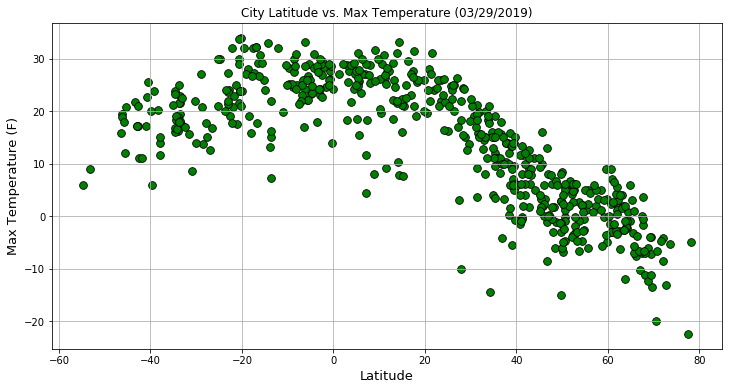

In [128]:
# Create a scatter plot 
weatherpy_df.plot(kind="scatter", x="Latitude", y="Max Temperature", marker='o', grid=True, figsize=(12,6),
              linewidths = 0.80, edgecolors = 'black', color = 'green', s=60)

plt.title("City Latitude vs. Max Temperature (03/29/2019)")
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Max Temperature (F)", fontsize=13)

#Save Figure
plt.savefig("images/latVStemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

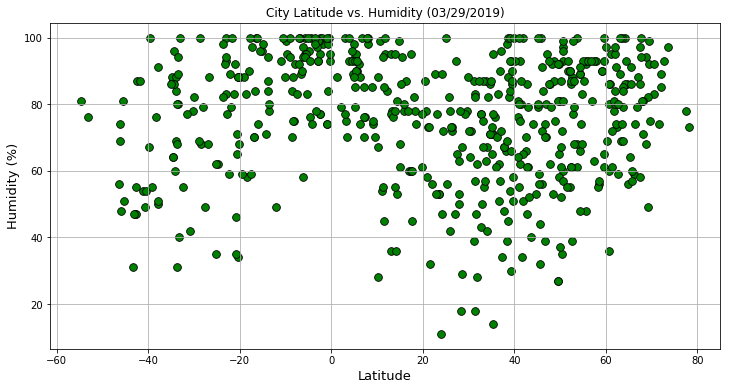

In [132]:
# Create a scatter plot 
weatherpy_df.plot(kind="scatter", x="Latitude", y="Humidity", marker='o', grid=True, figsize=(12,6),
              linewidths = 0.80, edgecolors = 'black', color = 'green', s=60)

plt.title("City Latitude vs. Humidity (03/29/2019)")
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Humidity (%)", fontsize=13)

#Save Figure
plt.savefig("images/latVShumi.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

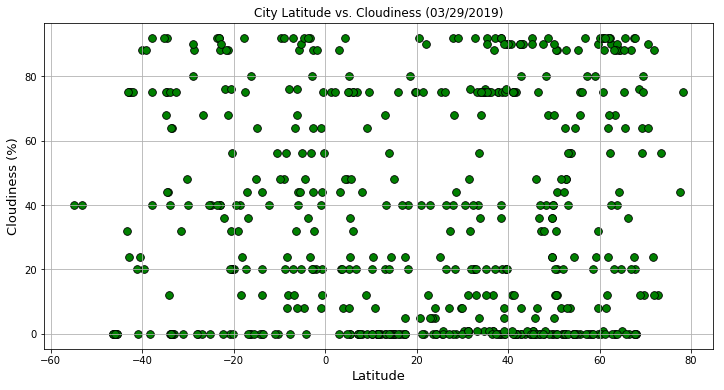

In [133]:
# Create a scatter plot 
weatherpy_df.plot(kind="scatter", x="Latitude", y="Cloudiness", marker='o', grid=True, figsize=(12,6),
              linewidths = 0.80, edgecolors = 'black', color = 'green', s=60)

plt.title("City Latitude vs. Cloudiness (03/29/2019)")
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Cloudiness (%)", fontsize=13)

#Save Figure
plt.savefig("images/latVScloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

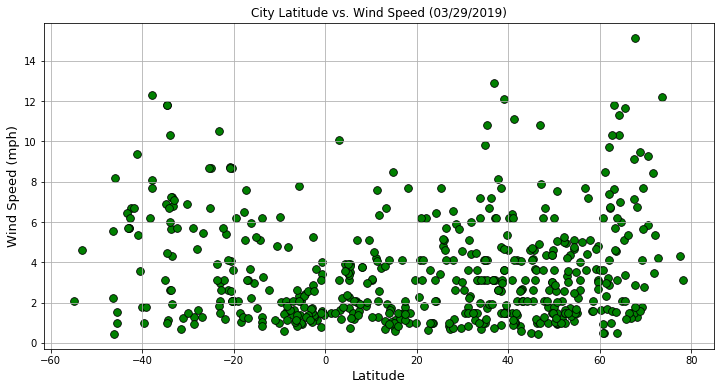

In [134]:
# Create a scatter plot 
weatherpy_df.plot(kind="scatter", x="Latitude", y="Wind Speed", marker='o', grid=True, figsize=(12,6),
              linewidths = 0.80, edgecolors = 'black', color = 'green', s=60)

plt.title("City Latitude vs. Wind Speed (03/29/2019)")
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Wind Speed (mph)", fontsize=13)


#Save Figure
plt.savefig("images/latVSwind.png")

# Show plot
plt.show()